In [1]:
import pandas as pd
import numpy as np

In [3]:
game=pd.read_csv('nn_dataCollection.csv', header=None)
game.head()

,0,1,2,3
0,-258.612557,345.5,0.0,0.00
1,-258.612557,345.5,-0.1,0.04
2,-258.652557,345.6,-0.2,0.00
3,-258.652557,345.8,-0.3,0.04
4,-258.692557,346.1,-0.4,0.00


## Data Preprocessing

Upon observing the data, some values which are not in accordance to the rest of the data have been removed

In [7]:
game.drop(game[game[3]==0].index, inplace=True)

In [9]:
game.drop(game[game[3]==0.04].index, inplace=True)

In [11]:
game.shape

(133736, 4)

In [13]:
game=game.head(80000)

## Data Normalization

In [16]:
data=pd.DataFrame()
def normal(n):
    for i in range(0,4):
        data[i]= (n[i]-n[i].min())/(n[i].max()-n[i].min())
    return data    

In [18]:
normal(game)

,0,1,2,3
92,0.294934,0.365465,0.645781,0.447910
93,0.294977,0.358623,0.638095,0.445506
94,0.295037,0.351943,0.630602,0.442374
95,0.295120,0.345421,0.623323,0.438523
96,0.295230,0.339052,0.616276,0.433964
...,...,...,...,...
84714,0.457748,0.529758,0.381163,0.387683
84715,0.458219,0.528496,0.389683,0.392094
84716,0.458658,0.527055,0.398203,0.396504
84717,0.459066,0.525434,0.406724,0.400915


## Renaming the columns

In [21]:
data.columns =['Input_X1', 'Input_X2', 'Velocity_Y1', 'Velocity_Y2']

In [23]:
cols=data.columns =['Input_X1', 'Input_X2', 'Velocity_Y1', 'Velocity_Y2']

## Splitting the dataset into train, test and validation

In [26]:
game_data=data.sample(frac=1)

In [28]:
game_data.shape[0]

80000

In [30]:
ratio=0.6
rows=game_data.shape[0]
print(f"The number of rows is {rows}")
tr_size=int(ratio*rows)
print(f"Training data is 70% , which is {tr_size} rows")

The number of rows is 80000
Training data is 70% , which is 48000 rows


In [32]:
print('The test data is going to be 20%')
last_20=int(0.2*len(game_data))
val_size=game_data.tail(last_20)
roww=val_size.shape[0]
print(f'The number of rows is {roww}')
val_rows=rows-roww
print(f" Validation data will be till the row number {val_rows}")

The test data is going to be 20%
The number of rows is 16000
 Validation data will be till the row number 64000


In [34]:
train_set=game_data[0:tr_size]
val_set=game_data[tr_size:val_rows]
test_set=game_data[val_rows:]

In [36]:
print('Let us confirm that there is no overlapping of rows in train, test and validation.')
t1=train_set.shape[0]
print(f'Number of rows in train are {t1}')
t2=val_set.shape[0]
print(f'Number of rows in validation are {t2}')
t3=test_set.shape[0]
print(f'Number of rows in test are {t3}')
total_rows=t1+t2+t3
print(f"The total should be 133736. The answer we have got it is {total_rows}. If the rows match, we can conclude that the data doesn't overlap in train, validation and test")

Let us confirm that there is no overlapping of rows in train, test and validation.
Number of rows in train are 48000
Number of rows in validation are 16000
Number of rows in test are 16000
The total should be 133736. The answer we have got it is 80000. If the rows match, we can conclude that the data doesn't overlap in train, validation and test


## Feedforward Neural Network

#### Creating input data and out put data for train, validation and test

In [40]:
X_train_set=train_set.drop(['Velocity_Y1','Velocity_Y2'], axis=1)
Y_train_set=train_set.drop(['Input_X1','Input_X2'], axis=1)

In [42]:
X_val_set=val_set.drop(['Velocity_Y1','Velocity_Y2'], axis=1)
Y_val_set=val_set.drop(['Input_X1','Input_X2'], axis=1)

In [44]:
X_test_set=test_set.drop(['Velocity_Y1','Velocity_Y2'], axis=1)
Y_test_set=test_set.drop(['Input_X1','Input_X2'], axis=1)

In [46]:
X_train_input=np.array(X_train_set)
Y_train_output=np.array(Y_train_set)


In [48]:
X_val_input=np.array(X_val_set)
Y_val_output=np.array(Y_val_set)


In [50]:
X_test_input=np.array(X_test_set)
Y_test_output=np.array(Y_test_set)

#### Finding the mean of the train, validation, test outputs

In [53]:
actual_1_tr=Y_train_output[0]
actual_2_tr=Y_train_output[1]

In [55]:
mean_act_1=np.mean(actual_1_tr)
mean_act_2=np.mean(actual_2_tr)

In [57]:
mean_actual_train=(np.sum(mean_act_1+mean_act_2)/2)

In [59]:
actual_1_val=Y_val_output[0]
actual_2_val=Y_val_output[1]
mean_act_1_va=np.mean(actual_1_val)
mean_act_2_va=np.mean(actual_2_val)

In [61]:
mean_actual_val=(np.sum(mean_act_1_va + mean_act_2_va)/2)

In [64]:
mean_actual_val

0.41600634338935

In [66]:
actual_1_test=Y_test_output[0]
actual_2_test=Y_test_output[1]
mean_act_1_test=np.mean(actual_1_test)
mean_act_2_test=np.mean(actual_2_test)

In [68]:
mean_actual_test=(np.sum(mean_act_1_test + mean_act_2_test)/2)

#### Adding bias to the train and validation sets

In [72]:
bias_train=np.ones((len(X_train_input)))

In [74]:
bias_val=np.ones((len(X_val_input)))

In [76]:
bias_test=np.ones((len(X_test_input)))

In [79]:
X_ren_train=np.insert(X_train_input,2,bias_train, axis=1)

In [81]:
X_train_input=X_ren_train.reshape(48000,3)

In [83]:
X_ren_val=np.insert(X_val_input,2,bias_val, axis=1)

In [85]:
X_val_input.shape

(16000, 2)

In [87]:
X_val_input=X_ren_val.reshape(16000,3)

In [90]:
X_ren_test=np.insert(X_test_input,2,bias_test, axis=1)

In [92]:
X_ren_test.shape

(16000, 3)

In [94]:
X_test_input=X_ren_test.reshape(16000,3)

## Code for Feedforward and backpropagation

For epoch 1, Training_rmse: 24.18769418326831, Validation_rmse: 14.698932309621593
For epoch 2, Training_rmse: 27.56081787662675, Validation_rmse: 14.417386328796152
For epoch 3, Training_rmse: 28.960357324900404, Validation_rmse: 15.256054176013183
For epoch 4, Training_rmse: 39.23562008780063, Validation_rmse: 27.284865179101182
For epoch 5, Training_rmse: 55.57575912683581, Validation_rmse: 32.81829180698046
For epoch 6, Training_rmse: 55.6123700500324, Validation_rmse: 32.79639944196611
For epoch 7, Training_rmse: 55.622912061761824, Validation_rmse: 32.768552719195355
For epoch 8, Training_rmse: 55.631322855396775, Validation_rmse: 32.73654645600293
For epoch 9, Training_rmse: 53.947266072668, Validation_rmse: 28.740469831510733
For epoch 10, Training_rmse: 47.59736834820494, Validation_rmse: 28.673313364856174
For epoch 11, Training_rmse: 47.598997764440696, Validation_rmse: 28.605254872031292
For epoch 12, Training_rmse: 47.60048798511385, Validation_rmse: 28.536959424627295
For

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_17424\517811356.py:18: RuntimeWarning: overflow encountered in exp
  A=1/(1+np.exp(-(λ*n)))


For epoch 28, Training_rmse: 47.61531726133519, Validation_rmse: 27.64327049555444
For epoch 29, Training_rmse: 47.61588890085833, Validation_rmse: 27.605902342008438
For epoch 30, Training_rmse: 47.61643154321456, Validation_rmse: 27.570813353684933
For epoch 31, Training_rmse: 47.61694666226266, Validation_rmse: 27.537948648096926
For epoch 32, Training_rmse: 47.61743565188607, Validation_rmse: 27.507243761379183
For epoch 33, Training_rmse: 47.61789982930397, Validation_rmse: 27.478626560712772
For epoch 34, Training_rmse: 47.61834043827297, Validation_rmse: 27.452019299936783
For epoch 35, Training_rmse: 47.61875865246353, Validation_rmse: 27.427340761649496
For epoch 36, Training_rmse: 47.61915557916903, Validation_rmse: 27.404508413027653
For epoch 37, Training_rmse: 47.61953226345438, Validation_rmse: 27.383440491305105
For epoch 38, Training_rmse: 47.61988969274366, Validation_rmse: 27.364057929880474
For epoch 39, Training_rmse: 47.62022880178268, Validation_rmse: 27.346286038

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

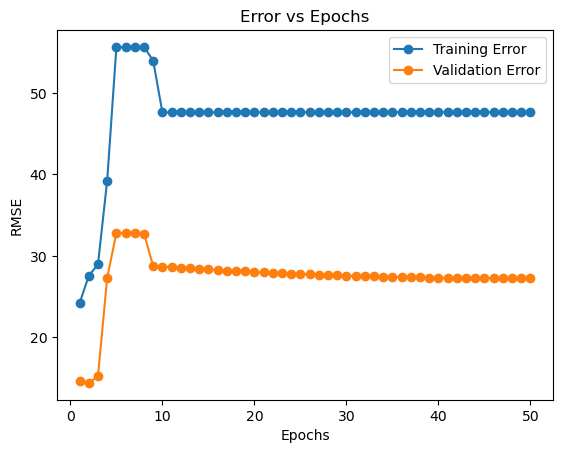

In [97]:
epochs = 50
input_size = 3
hidden_neurons = 10
output_size = 2
η = 0.3
α = 0.5
error_train = []
error_val = []

hidden_weights = 0.01*np.random.randn(input_size, hidden_neurons)
output_weights = 0.01*np.random.randn(hidden_neurons, output_size)
momentum_Δw = np.zeros((hidden_neurons, output_size))
momentum_Δwh = np.zeros((input_size, hidden_neurons))
decay_rate=0.95

λ=1
def sigmoid(n):
    A=1/(1+np.exp(-(λ*n)))
    return A


for epoch in range(epochs):

    error_rmse = np.zeros(2,)
    error_rmse_val = np.zeros(2,)

    for k in range(len(X_train_input)):
        hidden_output = np.dot(X_train_input[k], hidden_weights)
        hidden_input = sigmoid(hidden_output)
        pred_output = sigmoid(np.dot(hidden_input, output_weights))
        error_output = Y_train_output[k] - pred_output
        error_rmse += pred_output

        δk = λ * pred_output * (1 - pred_output) * error_output

        Δwk1 = []
        for i in range(len(δk)):
            for j in range(len(hidden_input)):
                dw1 = η * δk[i] * hidden_input[j]
                Δwk1.append(dw1)

        Δwk = np.array(Δwk1).reshape(hidden_neurons, output_size)

        output_weights = output_weights + Δwk + α * momentum_Δw

        δh = []
        for i in range(len(hidden_input)):
            dh = λ * hidden_input[i] * (1 - hidden_input[i]) * (δk[0] * output_weights[i][0] + δk[1] * output_weights[i][1])
            δh.append(dh)

        Δwh1 = []
        for i in range(len(δh)):
            for j in range(len(X_train_input[k])):
                dw2 = η * δh[i] * X_train_input[0][j]
                Δwh1.append(dw2)

        Δwh = np.array(Δwh1).reshape(input_size, hidden_neurons)

        hidden_weights = hidden_weights + Δwh + α * momentum_Δwh

        momentum_Δw = Δwk
        momentum_Δwh = Δwh
 
    η*=decay_rate
    rmse_1 = np.mean(error_rmse[0])
    rmse_2 = np.mean(error_rmse[1])
    mean_error_train = (rmse_1 + rmse_2) / 2

    rmse_train = np.sqrt((mean_error_train - mean_actual_train) ** 2 / len(X_train_input))
    error_train.append(rmse_train)

    for k in range(len(X_val_input)):
        hidden_output_v = np.dot(X_val_input[k], hidden_weights)
        hidden_input_v = sigmoid(hidden_output_v)
        pred_output_v = sigmoid(np.dot(hidden_input_v, output_weights))
        error_output_v = pred_output_v - Y_val_output[k]
        error_rmse_val += pred_output_v

    rmse_1_val = np.mean(error_rmse_val[0])
    rmse_2_val = np.mean(error_rmse_val[1])
    mean_error_val = (rmse_1_val + rmse_2_val) / 2

    rmse_val = np.sqrt((mean_error_val - mean_actual_val) ** 2 / len(X_val_input))
    error_val.append(rmse_val)



    print(f'For epoch {epoch + 1}, Training_rmse: {rmse_train}, Validation_rmse: {rmse_val}')



plt.plot(range(1, epoch + 2), error_train, marker='o', label='Training Error')
plt.plot(range(1, epoch + 2), error_val, marker='o', label='Validation Error')
plt.title('Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()



## Implementing Early Stopping Criteria and implement the corresponding weights on Test set

For epoch 1, Training_rmse: 87.41236746244192, Validation_rmse: 5.220744684655856
For epoch 2, Training_rmse: 29.797056521871056, Validation_rmse: 20.960211363734654
For epoch 3, Training_rmse: 20.643386872893114, Validation_rmse: 7.780145701045903
For epoch 4, Training_rmse: 14.693181291447793, Validation_rmse: 6.968009366975126
For epoch 5, Training_rmse: 12.85886814614041, Validation_rmse: 6.544311104800538
For epoch 6, Training_rmse: 11.572858745841035, Validation_rmse: 5.998711679686273
Early stopping at epoch 6
Test_rmse: 5.182634397670881


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

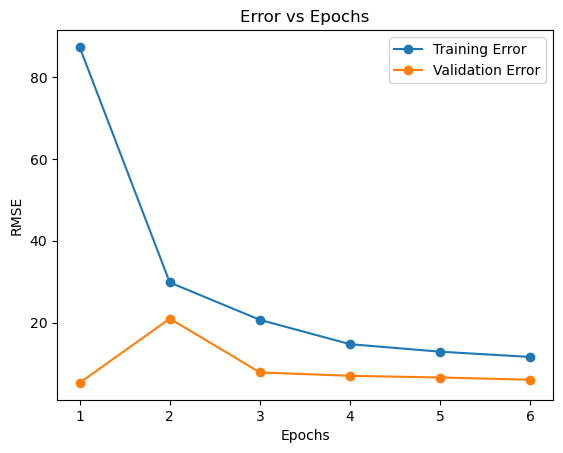

In [42]:

epochs = 150
input_size = 3
hidden_neurons = 30
output_size = 2
η = 0.3
α = 0.5
error_train = []
error_val = []
error_test=[]

hidden_weights = np.random.rand(input_size, hidden_neurons)
output_weights = np.random.rand(hidden_neurons, output_size)
momentum_Δw = np.zeros((hidden_neurons, output_size))
momentum_Δwh = np.zeros((input_size, hidden_neurons))
decay_rate=0.95

λ=1
def sigmoid(n):
    A=1/(1+np.exp(-(λ*n)))
    return A

tolerance = 5  # Number of epochs with no improvement after which training will be stopped
best_val_loss = float('inf')
best_weights_hidden = None
best_weights_output = None


for epoch in range(epochs):

    error_rmse = np.zeros(2,)
    error_rmse_val = np.zeros(2,)
    error_rmse_test=np.zeros(2,)

    for k in range(len(X_train_input)):
        #Feedforward network
        hidden_output = np.dot(X_train_input[k], hidden_weights)
        hidden_input = sigmoid(hidden_output)
        
        pred_output = sigmoid(np.dot(hidden_input, output_weights))
        
        error_output = Y_train_output[k] - pred_output
        error_rmse += pred_output
        
        #Backpropagation
        δk = λ * pred_output * (1 - pred_output) * error_output

        Δwk1 = []
        for i in range(len(δk)):
            for j in range(len(hidden_input)):
                dw1 = η * δk[i] * hidden_input[j]
                Δwk1.append(dw1)

        Δwk = np.array(Δwk1).reshape(hidden_neurons, output_size)
        
        # Updating the output_weights
        output_weights = output_weights + Δwk + (α * momentum_Δw)

        δh = []
        for i in range(len(hidden_input)):
            dh = λ * hidden_input[i] * (1 - hidden_input[i]) * (δk[0] * output_weights[i][0] + δk[1] * output_weights[i][1])
            δh.append(dh)

        Δwh1 = []
        for i in range(len(δh)):
            for j in range(len(X_train_input[k])):
                dw2 = η * δh[i] * X_train_input[0][j]
                Δwh1.append(dw2)

        Δwh = np.array(Δwh1).reshape(input_size, hidden_neurons)

        hidden_weights = hidden_weights + Δwh + (α * momentum_Δwh)

        momentum_Δw = Δwk
        momentum_Δwh = Δwh
 
    η*=decay_rate
    rmse_1 = np.mean(error_rmse[0])
    rmse_2 = np.mean(error_rmse[1])
    mean_error_train = (rmse_1 + rmse_2) / 2

    rmse_train = np.sqrt((mean_error_train - mean_actual_train) ** 2 / len(X_train_input))
    error_train.append(rmse_train)

    for k in range(len(X_val_input)):
        hidden_output_v = np.dot(X_val_input[k], hidden_weights)
        hidden_input_v = sigmoid(hidden_output_v)

        pred_output_v = sigmoid(np.dot(hidden_input_v, output_weights))
        error_output_v = pred_output_v - Y_val_output[k]
        error_rmse_val += pred_output_v

    rmse_1_val = np.mean(error_rmse_val[0])
    rmse_2_val = np.mean(error_rmse_val[1])
    mean_error_val = (rmse_1_val + rmse_2_val) / 2

    rmse_val = np.sqrt((mean_error_val - mean_actual_val) ** 2 / len(X_val_input))
    error_val.append(rmse_val)
    





    print(f'For epoch {epoch + 1}, Training_rmse: {rmse_train}, Validation_rmse: {rmse_val}')
        # Early stopping check
    if rmse_val < best_val_loss:
        best_val_loss = rmse_val
        best_weights_hidden = np.copy(hidden_weights)
        best_weights_output = np.copy(output_weights)
        tolerance_counter = 0
    else:
        tolerance_counter += 1
        if tolerance_counter >= tolerance:
            print(f'Early stopping at epoch {epoch + 1}')
            break


hidden_weights = best_weights_hidden
output_weights = best_weights_output

for k in range(len(X_test_input)):
    hidden_output_t = np.dot(X_test_input[k], hidden_weights)
    hidden_input_t = sigmoid(hidden_output_t)

    pred_output_t = sigmoid(np.dot(hidden_input_t, output_weights))
    error_output_t = pred_output_t - Y_test_output[k]
    error_rmse_test += pred_output_t

rmse_1_test = np.mean(error_rmse_test[0])
rmse_2_test = np.mean(error_rmse_test[1])
mean_error_test = (rmse_1_test + rmse_2_test) / 2

rmse_test = np.sqrt((mean_error_test - mean_actual_test) ** 2 / len(X_test_input))
error_test.append(rmse_test)
print(f'Test_rmse: {rmse_test}')

plt.plot(range(1, epoch + 2), error_train, marker='o', label='Training Error')
plt.plot(range(1, epoch + 2), error_val, marker='o', label='Validation Error')
plt.title('Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [45]:
hidden_weights

In [45]:
best_weights_hidden

array([[-4.31466763,  0.55175392, -8.36526087, -2.6060457 ],
       [ 0.70047304, -5.37626021,  1.75047346,  0.3419573 ],
       [ 2.08286967,  5.18985061,  1.23226541,  9.39432278]])

In [44]:
best_weights_output

array([[ -0.7196497 , -23.36850415],
       [-10.05148328, -28.92765808],
       [-26.61113837,  -0.13803241],
       [-22.7941933 , -24.21306043],
       [-28.02283506, -25.45416141],
       [-55.79002748, -32.76946788],
       [-26.85435542, -31.66093631],
       [-28.47280808, -27.70783889],
       [-27.18151639, -26.19553922],
       [-25.53412068, -27.16729057],
       [  6.78936568,  19.15177034],
       [ 10.00796178,  20.95358448],
       [ 23.38643857,  17.25887899],
       [ 19.5756878 ,  21.71320751],
       [ 23.04214657,  21.56850525],
       [ 22.7311508 ,  18.35633689],
       [ 20.29667878,  19.24068838],
       [ 23.17187892,  21.89464175],
       [ 22.63932816,  21.51143074],
       [ 20.20488984,  22.87211675]])

## Parameter Tuning for values of Lambda and Learning rate

For epoch 1, Training_rmse: 47.79584050807269, Validation_rmse: 17.753526738523362
For epoch 2, Training_rmse: 33.21100936017807, Validation_rmse: 15.788305028488326
For epoch 3, Training_rmse: 47.039760948740614, Validation_rmse: 32.41332046944312
For epoch 4, Training_rmse: 48.02956446320596, Validation_rmse: 18.980280171784266
For epoch 5, Training_rmse: 34.05466461025103, Validation_rmse: 23.412400840773106
For epoch 6, Training_rmse: 45.46269341309388, Validation_rmse: 25.39415192029059
For epoch 7, Training_rmse: 43.298715088196275, Validation_rmse: 23.77754029929354
Early stopping at epoch 7
For epoch 1, Training_rmse: 28.235028980096097, Validation_rmse: 5.4707470210917135
For epoch 2, Training_rmse: 7.4969750917618825, Validation_rmse: 5.725053175762726
For epoch 3, Training_rmse: 9.061027477612587, Validation_rmse: 5.649944362432036
For epoch 4, Training_rmse: 9.576168705184001, Validation_rmse: 8.384984765810561
For epoch 5, Training_rmse: 16.845522323071684, Validation_rmse

For epoch 2, Training_rmse: 89.20408022505976, Validation_rmse: 51.30964436473261
For epoch 3, Training_rmse: 89.18407160459878, Validation_rmse: 51.27552773264638
For epoch 4, Training_rmse: 89.14885547569824, Validation_rmse: 51.21568742789929
For epoch 5, Training_rmse: 89.08818800415428, Validation_rmse: 51.128175537619825
For epoch 6, Training_rmse: 88.98748695961095, Validation_rmse: 51.01836071807375
For epoch 7, Training_rmse: 88.84265220385656, Validation_rmse: 50.91008386825299
For epoch 8, Training_rmse: 88.69663546412137, Validation_rmse: 50.85688111355899
For epoch 9, Training_rmse: 88.65230769317694, Validation_rmse: 50.91604896153443
For epoch 10, Training_rmse: 88.70820687440522, Validation_rmse: 50.9801249535065
For epoch 11, Training_rmse: 88.18636930013894, Validation_rmse: 50.336469727248364
For epoch 12, Training_rmse: 85.82513566325761, Validation_rmse: 48.75207742709996
For epoch 13, Training_rmse: 82.27283340483368, Validation_rmse: 47.214372347057555
For epoch 

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (44,) and (139,)

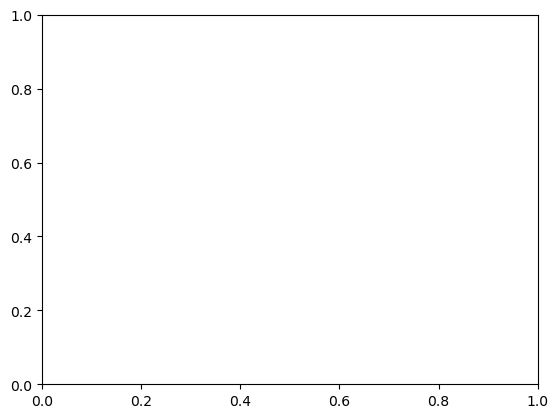

In [43]:
# Define hyperparameter values to be tested
learning_rate_values = [0.1, 0.3, 0.5]
lambda_values = [0.9, 0.95, 1.0]

best_config = None

epochs = 50
input_size = 3
hidden_neurons = 20
output_size = 2
η = 0.3
α = 0.5
error_train = []
error_val = []
error_test=[]
λ=1
def sigmoid(n):
    A=1/(1+np.exp(-(λ*n)))
    return A


for learning_rate in learning_rate_values:
    for λ in lambda_values:

        hidden_weights = 0.01*np.random.randn(input_size, hidden_neurons)
        output_weights = 0.01*np.random.randn(hidden_neurons, output_size)
        momentum_Δw = np.zeros((hidden_neurons, output_size))
        momentum_Δwh = np.zeros((input_size, hidden_neurons))
        decay_rate=0.95


        tolerance = 5  # Number of epochs with no improvement after which training will be stopped
        best_val_loss = float('inf')
        best_weights_hidden = None
        best_weights_output = None



        for epoch in range(epochs):

            error_rmse = np.zeros(2,)
            error_rmse_val = np.zeros(2,)
            error_rmse_test=np.zeros(2,)

            for k in range(len(X_train_input)):
                #Feedforward network
                hidden_output = np.dot(X_train_input[k], hidden_weights)
                hidden_input = sigmoid(hidden_output)

                pred_output = sigmoid(np.dot(hidden_input, output_weights))

                error_output = Y_train_output[k] - pred_output
                error_rmse += pred_output

                #Backpropagation
                δk = λ * pred_output * (1 - pred_output) * error_output

                Δwk1 = []
                for i in range(len(δk)):
                    for j in range(len(hidden_input)):
                        dw1 = η * δk[i] * hidden_input[j]
                        Δwk1.append(dw1)

                Δwk = np.array(Δwk1).reshape(hidden_neurons, output_size)

                # Updating the output_weights
                output_weights = output_weights + Δwk + (α * momentum_Δw)

                δh = []
                for i in range(len(hidden_input)):
                    dh = λ * hidden_input[i] * (1 - hidden_input[i]) * (δk[0] * output_weights[i][0] + δk[1] * output_weights[i][1])
                    δh.append(dh)

                Δwh1 = []
                for i in range(len(δh)):
                    for j in range(len(X_train_input[k])):
                        dw2 = η * δh[i] * X_train_input[0][j]
                        Δwh1.append(dw2)

                Δwh = np.array(Δwh1).reshape(input_size, hidden_neurons)

                hidden_weights = hidden_weights + Δwh + (α * momentum_Δwh)

                momentum_Δw = Δwk
                momentum_Δwh = Δwh

            η*=decay_rate
            rmse_1 = np.mean(error_rmse[0])
            rmse_2 = np.mean(error_rmse[1])
            mean_error_train = (rmse_1 + rmse_2) / 2

            rmse_train = np.sqrt((mean_error_train - mean_actual_train) ** 2 / len(X_train_input))
            error_train.append(rmse_train)

            for k in range(len(X_val_input)):
                hidden_output_v = np.dot(X_val_input[k], hidden_weights)
                hidden_input_v = sigmoid(hidden_output_v)

                pred_output_v = sigmoid(np.dot(hidden_input_v, output_weights))
                error_output_v = pred_output_v - Y_val_output[k]
                error_rmse_val += pred_output_v

            rmse_1_val = np.mean(error_rmse_val[0])
            rmse_2_val = np.mean(error_rmse_val[1])
            mean_error_val = (rmse_1_val + rmse_2_val) / 2

            rmse_val = np.sqrt((mean_error_val - mean_actual_val) ** 2 / len(X_val_input))
            error_val.append(rmse_val)






            print(f'For epoch {epoch + 1}, Training_rmse: {rmse_train}, Validation_rmse: {rmse_val}')
                # Early stopping check
            if rmse_val < best_val_loss:
                best_val_loss = rmse_val
                best_config = {'hidden_neurons': hidden_neurons, 'learning_rate': learning_rate}

                best_weights_hidden = np.copy(hidden_weights)
                best_weights_output = np.copy(output_weights)
                tolerance_counter = 0
            else:
                tolerance_counter += 1
                if tolerance_counter >= tolerance:
                    print(f'Early stopping at epoch {epoch + 1}')
                    break

print(f'Best configuration: {best_config}')

hidden_weights = best_weights_hidden
output_weights = best_weights_output

for k in range(len(X_test_input)):
    hidden_output_t = np.dot(X_test_input[k], hidden_weights)
    hidden_input_t = sigmoid(hidden_output_t)

    pred_output_t = sigmoid(np.dot(hidden_input_t, output_weights))
    error_output_t = pred_output_t - Y_test_output[k]
    error_rmse_test += pred_output_t

    rmse_1_test = np.mean(error_rmse_test[0])
    rmse_2_test = np.mean(error_rmse_test[1])
    mean_error_test = (rmse_1_test + rmse_2_test) / 2

    rmse_test = np.sqrt((mean_error_test - mean_actual_test) ** 2 / len(X_test_input))
    error_test.append(rmse_test)
    
print(f'Test_rmse: {rmse_test}')
plt.plot(range(1, epoch + 2), error_train, marker='o', label='Training Error')
plt.plot(range(1, epoch + 2), error_val, marker='o', label='Validation Error')
plt.title('Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()
